----------IRIS flowers cassification 

-Imoport Libraries and Packages

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

-Reading Dataset

In [58]:
df= pd.read_csv("IRIS.csv")

-Showing dataset and some Visualization

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.head(10).style.background_gradient(cmap='rainbow')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa
5,5.400000,3.900000,1.700000,0.400000,Iris-setosa
6,4.600000,3.400000,1.400000,0.300000,Iris-setosa
7,5.000000,3.400000,1.500000,0.200000,Iris-setosa
8,4.400000,2.900000,1.400000,0.200000,Iris-setosa
9,4.900000,3.100000,1.500000,0.100000,Iris-setosa


In [6]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.tail(10).style.background_gradient(cmap='rainbow')

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.700000,3.100000,5.600000,2.400000,Iris-virginica
141,6.900000,3.100000,5.100000,2.300000,Iris-virginica
142,5.800000,2.700000,5.100000,1.900000,Iris-virginica
143,6.800000,3.200000,5.900000,2.300000,Iris-virginica
144,6.700000,3.300000,5.700000,2.500000,Iris-virginica
145,6.700000,3.000000,5.200000,2.300000,Iris-virginica
146,6.300000,2.500000,5.000000,1.900000,Iris-virginica
147,6.500000,3.000000,5.200000,2.000000,Iris-virginica
148,6.200000,3.400000,5.400000,2.300000,Iris-virginica
149,5.900000,3.000000,5.100000,1.800000,Iris-virginica


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.shape

(150, 5)

<Figure size 1200x800 with 0 Axes>

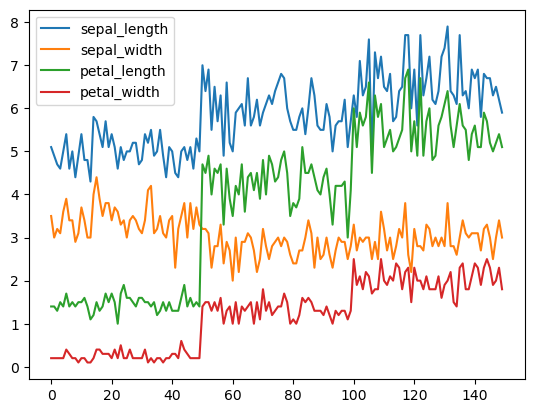

In [11]:
plt.figure(figsize=(12,8))
df.plot()
plt.show()

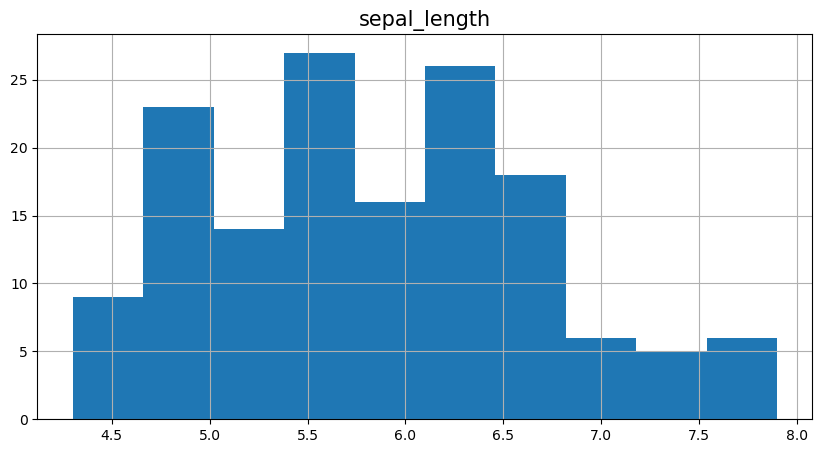

In [12]:
c1 = 'sepal_length'
plt.figure(figsize=(10,5))
df[c1].hist()
plt.title(c1,fontsize=15)
plt.show()

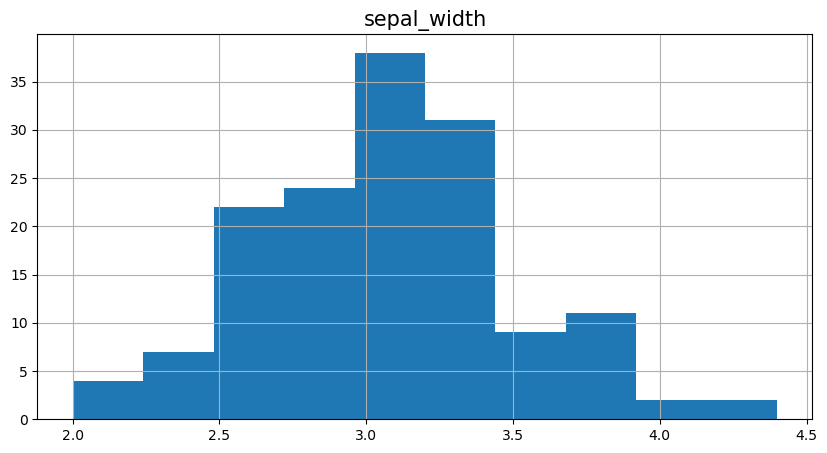

In [13]:
c2 = 'sepal_width'
plt.figure(figsize=(10,5))
df[c2].hist()
plt.title(c2,fontsize=15)
plt.show()

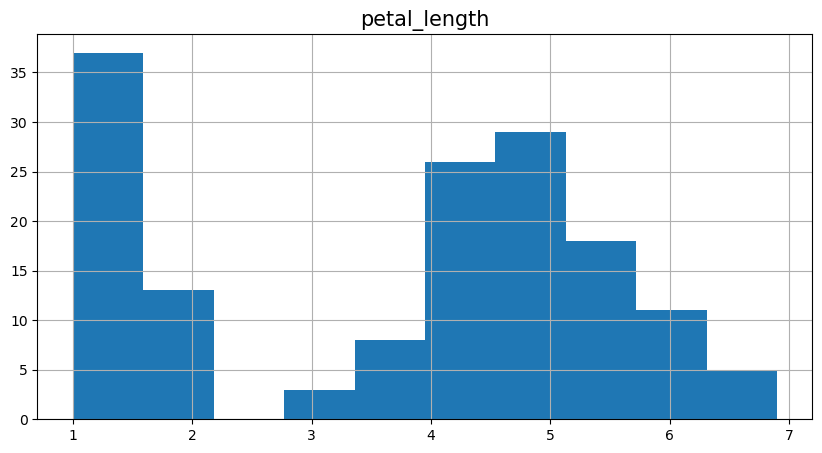

In [14]:
c3 = 'petal_length'
plt.figure(figsize=(10,5))
df[c3].hist()
plt.title(c3,fontsize=15)
plt.show()

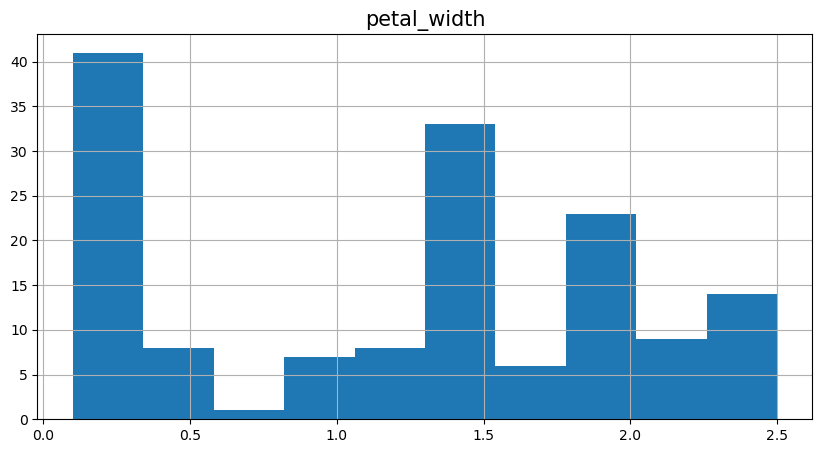

In [15]:
c4 = 'petal_width'
plt.figure(figsize=(10,5))
df[c4].hist()
plt.title(c4,fontsize=15)
plt.show()

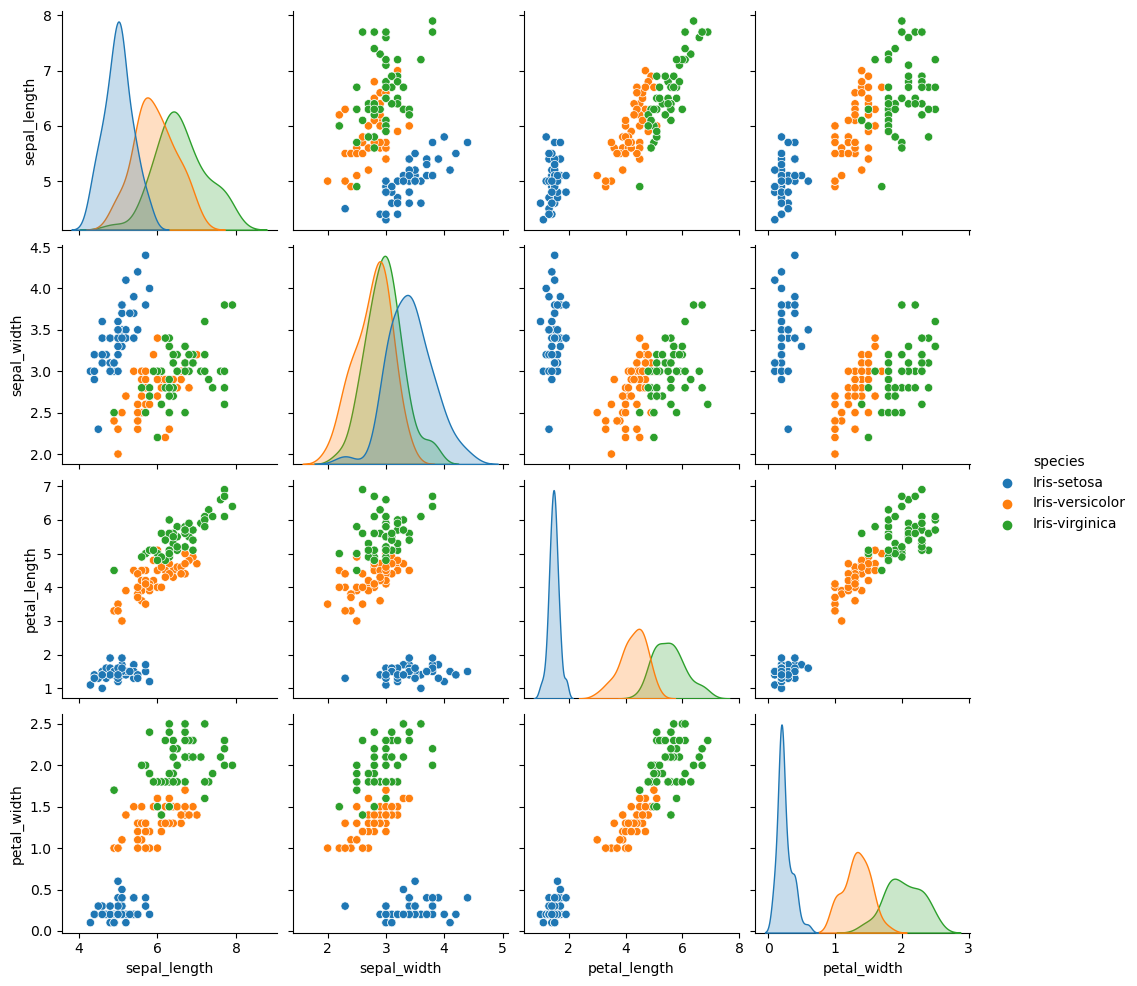

In [16]:
sns.pairplot(df,hue = ("species"))

In [17]:
df.drop_duplicates(inplace = True)

-Encoding and some preprocessing

In [18]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
df['species'].unique()

array([0, 1, 2])

In [20]:
X = df.drop(['species'], axis=1)
Y = df['species']

In [21]:
X.shape

(147, 4)

In [22]:
Y.shape

(147,)

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.30 )

In [35]:
X_train.shape

(102, 4)

In [36]:
Y_train.shape

(102,)

In [37]:
X_test.shape

(45, 4)

In [38]:
Y_test.shape

(45,)

-Training and Testing Models

In [39]:
# LogisticRegression
Lo_model=LogisticRegression(max_iter= 100)
Lo_model.fit(X_train,Y_train)
pred = Lo_model.predict(X_test)
print('Accuracy:', accuracy_score(pred,Y_test))

Accuracy: 0.9777777777777777


In [40]:
confusion = confusion_matrix(Y_test, pred)
print ("Confusion matrix:\n" ,confusion)
print(classification_report(Y_test,pred))

Confusion matrix:
 [[16  0  0]
 [ 0 13  1]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.93      0.96        14
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [41]:
# KNN
KNN_model = KNeighborsClassifier(n_neighbors = 4)
KNN_model.fit(X_train,Y_train)
y_pred2 = KNN_model.predict(X_test)

print('Accuracy:', accuracy_score(Y_test, y_pred2))

Accuracy: 0.9777777777777777


In [42]:
# DecisionTree
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)
pred_dt = dt_model.predict(X_test)
acc_dt = accuracy_score(Y_test, pred_dt)
print('Accuracy:', accuracy_score(Y_test,pred_dt))


Accuracy: 0.9777777777777777


In [43]:
acc_dt

0.9777777777777777

In [44]:
# SVM 
# import the classifier
from sklearn.svm import SVC 
dt_model = SVC(kernel='linear') 
# fit the classifier with x and y data
dt_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [46]:
Y_pred = dt_model.predict(X_test)

In [48]:
#confusion matrix

from sklearn.metrics import confusion_matrix

conf = confusion_matrix(Y_pred,Y_test)

print('confusion matrix',conf)

confusion matrix [[16  0  0]
 [ 0 13  0]
 [ 0  1 15]]


In [56]:
Accuracy = metrics.accuracy_score(Y_pred , Y_test)
# Model Accuracy: how often is the classifier correct?
print('Accuracy  :',Accuracy)

Accuracy  : 0.9777777777777777


Thanks.

Mahmoud Mohamed Rady.
Machine learning and AI student.
9/2023